# Align the three data sets into a single data set

There were three datasets merged together to form the final dataset used in the analysis.

The three datasets surveryed the same area, Lake Huron-Lake Erie Corridor, but at different times and have common variables.

The survery conducted in 2004 is the standard dataset, which contains rightly needed variables used to filter the variables in ther other two datasets.

<span style="color:blue">Different station IDs mean different sampling locations or times or both</span>, which emplies the ignoreance of the time factor(1991, 1999, 2004) in the analysis.

<span style="color:blue">However, not all station IDs have full information in the three aspects: stressors, taxonomic composition, and environmental condition</span>, some stations have the full information, some have only two types of them.

<span style="color:blue">Therefore, the stations that have full information will be ideal for model fitting</span>, while those with incomplete data may need to be excluded or treated with caution during analysis, they can be observations waiting to be inferred from the model fitted on the full data.

Therefore, the following work is to conduct this alignment and filtering work, found which stations are ideal for model fitting, and which ones are not.


In [105]:
# read the three types of data 
import pandas as pd

env_data = pd.read_excel('../data/processed_data/environmental_data.xlsx')
taxa_data = pd.read_excel('../data/processed_data/taxa_data.xlsx', index_col = 0)
stressor_data = pd.read_excel('../data/processed_data/chemical_data.xlsx')

In [106]:
# check the data information
print(env_data.info())
print(f"The Environmental data has {env_data.shape[0]} rows and {env_data.shape[1]} columns.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Site ID                                289 non-null    object 
 1   Location                               289 non-null    object 
 2   Latitude                               289 non-null    float64
 3   Longitude                              289 non-null    float64
 4   Total Organic Carbon (LOI %)           289 non-null    float64
 5   Water Depth (m)                        289 non-null    float64
 6   Water Temperature (¬∞C)                289 non-null    float64
 7   Dissolved Oxygen Concentration (mg/L)  289 non-null    float64
 8   Median Particle Size (Phi)             289 non-null    float64
dtypes: float64(7), object(2)
memory usage: 20.4+ KB
None
The Environmental data has 289 rows and 9 columns.


<span style="color:blue">Taxa data needs to drop off duplicate rows across the four subsheets: c1 c2, dr2 dr3</span>.

In [107]:
# remove the duplicate rows in the taxa data
print(f"Before removing duplicates, the taxa data has {taxa_data.shape[0]} rows and {taxa_data.shape[1]} columns.")
taxa_data["StationID"] = taxa_data.index.astype(str)
taxa_data = taxa_data.drop_duplicates(subset=['StationID'], keep='first')
print(f"After removing ducplicates, the Taxa data has {taxa_data.shape[0]} rows and {taxa_data.shape[1]} columns.")
print(f"The 311 number is the exact number as Jian appendix table data")
print(taxa_data.info())

Before removing duplicates, the taxa data has 383 rows and 16 columns.
After removing ducplicates, the Taxa data has 311 rows and 17 columns.
The 311 number is the exact number as Jian appendix table data
<class 'pandas.core.frame.DataFrame'>
Index: 311 entries, 003ABC to S95
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Oligochaeta        311 non-null    float64
 1   Nematoda           311 non-null    float64
 2   Chironomidae       311 non-null    float64
 3   Ceratopogonidae    311 non-null    float64
 4   Hexagenia          311 non-null    float64
 5   Caenis             311 non-null    float64
 6   Hydropsychidae     311 non-null    float64
 7   Other Trichoptera  311 non-null    float64
 8   Amphipoda          311 non-null    float64
 9   Dreissena          311 non-null    float64
 10  Acari              311 non-null    float64
 11  Hydrozoa           311 non-null    float64
 12  Hirudinea    

In [108]:
print(stressor_data.info())
print(f"The Stressor data has {stressor_data.shape[0]} rows and {stressor_data.shape[1]} columns.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   StationNoID         104 non-null    object 
 1   Al                  104 non-null    int64  
 2   As                  104 non-null    float64
 3   Bi                  104 non-null    float64
 4   Ca                  104 non-null    int64  
 5   Cd                  104 non-null    float64
 6   Co                  104 non-null    float64
 7   Cr                  104 non-null    float64
 8   Cu                  104 non-null    float64
 9   Fe                  104 non-null    int64  
 10  Hg                  104 non-null    float64
 11  K                   104 non-null    float64
 12  Mg                  104 non-null    int64  
 13  Mn                  104 non-null    float64
 14  Na                  104 non-null    float64
 15  Ni                  104 non-null    float64
 16  Pb      

In [109]:
print(f"The three data sets have different number of rows {env_data.shape[0]}, {taxa_data.shape[0]}, {stressor_data.shape[0]}, which means that they are not aligned by Station IDs.")

The three data sets have different number of rows 289, 311, 104, which means that they are not aligned by Station IDs.


## Start aligning from the smallest data set (stressor data)

In [110]:
# check the stressor data
stressor_data.head()

,StationNoID,Al,As,Bi,Ca,Cd,Co,Cr,Cu,Fe,...,1245-TCB,1234-TCB,QCB,HCB,OCS,"p,p'-DDE","p,p'-DDD",mirex,Heptachlor Epoxide,total PCB
0,S1,1501,2.096,25.800,43640,0.4436,2.096,3.674,0.0000,5352,...,0.000000,0.000000,0.231488,0.443643,0.527393,0.578356,0.215674,0.000000,0.000000,0.275905
1,S3,4491,0.000,2.143,33160,0.2120,4.599,7.663,0.5824,34600,...,5.287350,0.496244,21.543254,628.431425,12.299283,0.243611,0.157359,0.125621,0.194148,3.867986
2,S4,2666,2.188,31.790,40140,0.5341,2.991,5.672,4.0580,7506,...,2.199412,0.169937,3.553463,25.614729,0.000000,0.228949,0.545388,0.000000,0.937635,6.806353
3,A5,2283,2.233,20.110,41360,0.2387,2.702,8.566,9.5820,8410,...,0.252477,0.182194,0.375649,0.184464,0.569763,0.279666,0.474567,0.000000,0.000000,1.524323
4,S5,6711,4.298,27.480,43960,1.0240,6.032,11.520,13.4800,11920,...,4.798342,0.135384,3.744199,56.128616,0.000000,0.257757,0.573263,0.296265,0.000000,9.814389


The stations in the stressor data are almost named starting with "S" or "A".

By checking the appendix, these stations spread across the three zones: Detroit River, St. Clair River and Lake St. Clair.

In [111]:
# rename the merging on column to 'StationID' in all data sets for clarity
stressor_data.rename(columns={'StationNoID': 'StationID'}, inplace=True)
env_data.rename(columns={'Site ID': 'StationID'}, inplace=True)
print(f"After renaming, the Stressor data has columns: {stressor_data.columns.tolist()[0]} in its columns.")
print(f"After renaming, the Environmental data has columns: {env_data.columns.tolist()[0]} in its columns.")

After renaming, the Stressor data has columns: StationID in its columns.
After renaming, the Environmental data has columns: StationID in its columns.


In [112]:
# First, merge the stressor data with the taxa data
stressor_env_merged = pd.merge(stressor_data, env_data, on='StationID', how='inner')
stressor_env_merged.head()

,StationID,Al,As,Bi,Ca,Cd,Co,Cr,Cu,Fe,...,Heptachlor Epoxide,total PCB,Location,Latitude,Longitude,Total Organic Carbon (LOI %),Water Depth (m),Water Temperature (¬∞C),Dissolved Oxygen Concentration (mg/L),Median Particle Size (Phi)
0,S1,1501,2.096,25.800,43640,0.4436,2.096,3.674,0.0000,5352,...,0.000000,0.275905,SCR,43.01,-82.41,0.41,4.6,20.77,10.03,1.43
1,S3,4491,0.000,2.143,33160,0.2120,4.599,7.663,0.5824,34600,...,0.194148,3.867986,SCR,42.95,-82.43,1.19,3.0,20.33,10.26,1.20
2,S4,2666,2.188,31.790,40140,0.5341,2.991,5.672,4.0580,7506,...,0.937635,6.806353,SCR,42.92,-82.45,1.46,4.6,20.03,9.97,1.10
3,A5,2283,2.233,20.110,41360,0.2387,2.702,8.566,9.5820,8410,...,0.000000,1.524323,SCR,42.88,-82.46,1.10,5.0,19.78,9.03,-1.30
4,S5,6711,4.298,27.480,43960,1.0240,6.032,11.520,13.4800,11920,...,0.000000,9.814389,SCR,42.87,-82.46,2.76,1.5,19.86,8.50,1.68


The merged data should keep the same row dimension as the stressor data, which is the smallest data set.

In [113]:
print(f"The stressor data has {stressor_data.shape[0]} rows and {stressor_data.shape[1]} columns.")
print(f"The environmental data has {env_data.shape[0]} rows and {env_data.shape[1]} columns.")
print(f"The merged data has the raw dimension of {stressor_env_merged.shape[0]} rows and {stressor_env_merged.shape[1]} columns.")

The stressor data has 104 rows and 31 columns.
The environmental data has 289 rows and 9 columns.
The merged data has the raw dimension of 104 rows and 39 columns.


In [114]:
stressor_env_merged.columns

Index(['StationID', 'Al', 'As', 'Bi', 'Ca', 'Cd', 'Co', 'Cr', 'Cu', 'Fe', 'Hg',
       'K', 'Mg', 'Mn', 'Na', 'Ni', 'Pb', 'Sb', 'V', 'Zn', '%OC', '1245-TCB',
       '1234-TCB', 'QCB', 'HCB', 'OCS', 'p,p'-DDE', 'p,p'-DDD', 'mirex',
       'Heptachlor Epoxide', 'total PCB', 'Location', 'Latitude', 'Longitude',
       'Total Organic Carbon (LOI %)', 'Water Depth (m)',
       'Water Temperature (¬∞C)', 'Dissolved Oxygen Concentration (mg/L)',
       'Median Particle Size (Phi)'],
      dtype='object')

If continue to merge with the taxa data, it should keep the same row dimension as the stressor data, which is the smallest data set.

In [115]:
# if continue to merge with the taxa data, it should keep the same row dimension as the stressor data, which is the smallest data set.
full_data = pd.merge(stressor_env_merged, taxa_data, on='StationID', how='inner')
print(f"The full data has {full_data.shape[0]} rows and {full_data.shape[1]} columns.")
print(full_data.info())

The full data has 104 rows and 55 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 55 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   StationID                              104 non-null    object 
 1   Al                                     104 non-null    int64  
 2   As                                     104 non-null    float64
 3   Bi                                     104 non-null    float64
 4   Ca                                     104 non-null    int64  
 5   Cd                                     104 non-null    float64
 6   Co                                     104 non-null    float64
 7   Cr                                     104 non-null    float64
 8   Cu                                     104 non-null    float64
 9   Fe                                     104 non-null    int64  
 10  Hg                             

# Add location for all observations in three data sets

The locations were extracted from the appendix of the thesis of Jian

In [116]:
# stations and their locations
station_locs = env_data[['StationID', 'Latitude', 'Longitude']]
station_locs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   StationID  289 non-null    object 
 1   Latitude   289 non-null    float64
 2   Longitude  289 non-null    float64
dtypes: float64(2), object(1)
memory usage: 6.9+ KB


In [117]:
# merge this location data with the other three data sets
print(f"Before merging, the Stressor data has {stressor_data.shape[0]} rows and {stressor_data.shape[1]} columns.")
stressor_data = pd.merge(stressor_data, station_locs, on='StationID', how='left')
print(f"After merging, the Stressor data has {stressor_data.shape[0]} rows and {stressor_data.shape[1]} columns.")
print(f"Before merging, the Taxa data has {taxa_data.shape[0]} rows and {taxa_data.shape[1]} columns.")
taxa_data = pd.merge(taxa_data, station_locs, on='StationID', how='left')
print(f"After merging, the Taxa data has {taxa_data.shape[0]} rows and {taxa_data.shape[1]} columns.")

Before merging, the Stressor data has 104 rows and 31 columns.
After merging, the Stressor data has 104 rows and 33 columns.
Before merging, the Taxa data has 311 rows and 17 columns.
After merging, the Taxa data has 311 rows and 19 columns.


# Visualize this difference with map

Now, having the locations of all stations in the three datasets, we can visualize the differences in sampling locations across the datasets.

/var/folders/s5/r1s56_ps46lbbv1370hjn_vr0000gn/T/ipykernel_16129/365121705.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


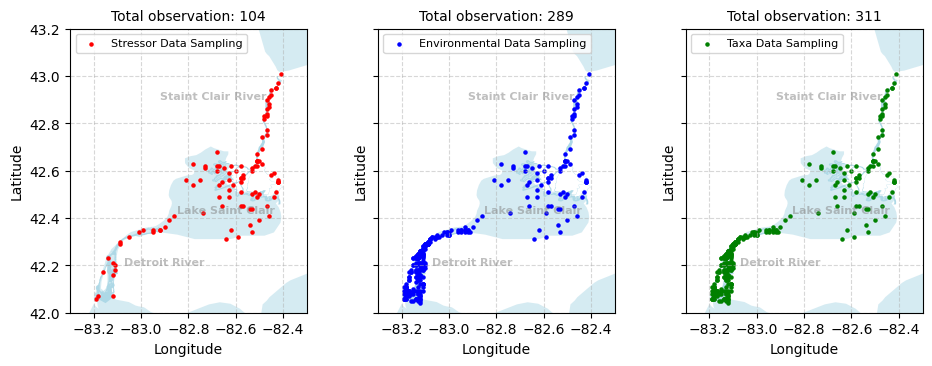

In [118]:
from PyModules import Visualization as vis
import geopandas as gpd
import matplotlib.pyplot as plt
import importlib
importlib.reload(vis)

fig, axes = plt.subplots(1, 3, figsize=(11, 5), gridspec_kw={'wspace': 0.3, 'hspace': 0.3}, sharey= True)

# ax1: the general area of the Huron-Erie Corridor
# vis.plot_rivers_lakes(annotating=True, ax=axes[0, 0])

# ax2: the stressor data distribution
# create a GeoDataFrame for the stressor data
stressor_gdf = gpd.GeoDataFrame(stressor_data, geometry=gpd.points_from_xy(stressor_data.Longitude, stressor_data.Latitude))
# plot the sampling locations of the stressor data
vis.plot_rivers_lakes(annotating=False, ax=axes[0])
stressor_gdf.plot(ax=axes[0], color='red', markersize=5, label='Stressor Data Sampling')
axes[0].set_title(f"Total observation: {stressor_data.shape[0]}", fontsize=10)

# ax3: the environmental data distribution
# create a GeoDataFrame for the environmental data
env_gdf = gpd.GeoDataFrame(env_data, geometry=gpd.points_from_xy(env_data.Longitude, env_data.Latitude))
# plot the sampling locations of the environmental data
vis.plot_rivers_lakes(annotating=False, ax=axes[1])
env_gdf.plot(ax=axes[1], color='blue', markersize=5, label='Environmental Data Sampling')
axes[1].set_title(f"Total observation: {env_data.shape[0]}", fontsize=10)

# ax4: the taxa data distribution
# create a GeoDataFrame for the taxa data
taxa_gdf = gpd.GeoDataFrame(taxa_data, geometry=gpd.points_from_xy(taxa_data.Longitude, taxa_data.Latitude))
# plot the sampling locations of the taxa data
vis.plot_rivers_lakes(annotating=False, ax=axes[2])
taxa_gdf.plot(ax=axes[2], color='green', markersize=5, label='Taxa Data Sampling')
axes[2].set_title(f"Total observation: {taxa_data.shape[0]}", fontsize=10)

for ax in axes:
    ax.text(-82.85, 42.42, 'Lake Saint Clair', fontsize=8, color = 'gray', weight='bold', alpha=0.5)
    ax.text(-83.07, 42.2, 'Detroit River', fontsize=8, color='gray', weight='bold', alpha=0.5)
    ax.text(-82.92, 42.9, 'Staint Clair River', fontsize=8, color='gray', weight='bold', alpha=0.5)
    ax.legend(fontsize=8, loc='upper left')
    ax.grid(True, linestyle='--', alpha=0.5)
    
plt.tight_layout()
plt.savefig("../results/different_data_sampling_locations.png", dpi=600)

In [119]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 55 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   StationID                              104 non-null    object 
 1   Al                                     104 non-null    int64  
 2   As                                     104 non-null    float64
 3   Bi                                     104 non-null    float64
 4   Ca                                     104 non-null    int64  
 5   Cd                                     104 non-null    float64
 6   Co                                     104 non-null    float64
 7   Cr                                     104 non-null    float64
 8   Cu                                     104 non-null    float64
 9   Fe                                     104 non-null    int64  
 10  Hg                                     104 non-null    float64
 11  K     

# Data Exploration

Subjectively set water velocity be a more important environmental factor than others.

First reduce the dimention of stressor data to the most important principal components.

In [120]:
# extract wanted columns from the stressor data
cols = ['StationID', 'Latitude', 'Longitude'] + [col for col in stressor_data.columns if col not in ['StationID', 'Latitude', 'Longitude']]
stressor_data = stressor_data[cols]
stressor_data.columns

Index(['StationID', 'Latitude', 'Longitude', 'Al', 'As', 'Bi', 'Ca', 'Cd',
       'Co', 'Cr', 'Cu', 'Fe', 'Hg', 'K', 'Mg', 'Mn', 'Na', 'Ni', 'Pb', 'Sb',
       'V', 'Zn', '%OC', '1245-TCB', '1234-TCB', 'QCB', 'HCB', 'OCS',
       'p,p'-DDE', 'p,p'-DDD', 'mirex', 'Heptachlor Epoxide', 'total PCB'],
      dtype='object')

In [121]:
# extract the stressor variables (excluding StationID, Latitude, and Longitude)
stressor_variables = stressor_data.columns.tolist()[3:]
print(f"The stressor variables are: {stressor_variables}")

The stressor variables are: ['Al', 'As', 'Bi', 'Ca', 'Cd', 'Co', 'Cr', 'Cu', 'Fe', 'Hg', 'K', 'Mg', 'Mn', 'Na', 'Ni', 'Pb', 'Sb', 'V', 'Zn', '%OC', '1245-TCB', '1234-TCB', 'QCB', 'HCB', 'OCS', "p,p'-DDE", "p,p'-DDD", 'mirex', 'Heptachlor Epoxide', 'total PCB']


In [122]:
from PyModules import DataStats
from PyModules import PCAAssessment as pca_
from sklearn.pipeline import Pipeline

# make the pipeline for pollutant PCA
pollutant_pcs_pipeline = Pipeline([
    ('scaler', pca_.DataFrameScaler()),  # Keeps column names
    ('pca', pca_.CustomWeightedPCA(weights=None, return_loadings = True)),  # PCA returns loadings with variable names
    ('selector', pca_.PollutantPCSelector(pollutant_dict=DataStats.nontoxic_pollutant_dict, threshold=0.6))
])

chemical_data = full_data.iloc[:, full_data.columns.isin(stressor_variables)].copy()
chemical_data.index = full_data["StationID"]

pollutant_pcs = pollutant_pcs_pipeline.fit_transform(chemical_data).index.values

# make the pipeline for pollutant PCA
pollutant_scores_pipeline = Pipeline([
    ('scaler', pca_.DataFrameScaler()),  # Keeps column names
    ('pca', pca_.CustomWeightedPCA(weights=None, return_loadings = False))])

station_pollutant_scores = pollutant_scores_pipeline.fit_transform(chemical_data)[pollutant_pcs]

station_pollutant_scores.head()

,PC5,PC2,PC20,PC13,PC1,PC11
StationID,,,,,,
S1,-0.408489,0.153719,0.216746,0.987933,-3.140669,-0.256047
S3,3.688714,-2.992930,0.107852,0.135550,0.790253,-1.224411
S4,0.618755,0.286057,0.047750,-0.506377,-2.184290,-0.309212
A5,-0.475166,-0.337929,0.608157,0.140515,-1.797105,0.050814
S5,0.812904,-0.275633,-0.801488,-0.014557,2.403213,-1.180630


Simply add all PC values as the stress level, do not care about the signs in the PC values, assuming the higher the sum, the more 
stressful the environment is.

In [123]:
station_pollutant_scores["stress_level"] = station_pollutant_scores.sum(axis=1)
station_pollutant_scores.head()

,PC5,PC2,PC20,PC13,PC1,PC11,stress_level
StationID,,,,,,,
S1,-0.408489,0.153719,0.216746,0.987933,-3.140669,-0.256047,-2.446806
S3,3.688714,-2.992930,0.107852,0.135550,0.790253,-1.224411,0.505028
S4,0.618755,0.286057,0.047750,-0.506377,-2.184290,-0.309212,-2.047317
A5,-0.475166,-0.337929,0.608157,0.140515,-1.797105,0.050814,-1.810714
S5,0.812904,-0.275633,-0.801488,-0.014557,2.403213,-1.180630,0.943809


Attach the stress level to original data

In [124]:
# add the stress level to the full data
full_data["stress_level"] = station_pollutant_scores["stress_level"].values.copy()
full_data.head()

,StationID,Al,As,Bi,Ca,Cd,Co,Cr,Cu,Fe,...,Other Trichoptera,Amphipoda,Dreissena,Acari,Hydrozoa,Hirudinea,Turbellaria,Gastropoda,Sphaeriidae,stress_level
0,S1,1501,2.096,25.800,43640,0.4436,2.096,3.674,0.0000,5352,...,3.203427e-16,3.203427e-16,3.203427e-16,3.203427e-16,3.203427e-16,3.203427e-16,3.203427e-16,3.203427e-16,3.203427e-16,-2.446806
1,S3,4491,0.000,2.143,33160,0.2120,4.599,7.663,0.5824,34600,...,4.516960e-01,3.203427e-16,3.203427e-16,7.951802e-01,4.516960e-01,3.203427e-16,3.203427e-16,7.951802e-01,3.203427e-16,0.505028
2,S4,2666,2.188,31.790,40140,0.5341,2.991,5.672,4.0580,7506,...,4.087463e+00,2.321928e+00,1.874469e+00,2.321928e+00,1.874469e+00,3.203427e-16,3.203427e-16,3.203427e-16,1.222392e+00,-2.047317
3,A5,2283,2.233,20.110,41360,0.2387,2.702,8.566,9.5820,8410,...,5.300336e+00,7.862933e-01,4.362134e+00,3.203427e-16,3.203427e-16,3.203427e-16,3.203427e-16,3.203427e-16,3.203427e-16,-1.810714
4,S5,6711,4.298,27.480,43960,1.0240,6.032,11.520,13.4800,11920,...,3.203427e-16,3.203427e-16,2.762698e-01,3.203427e-16,3.203427e-16,5.502416e-01,5.502416e-01,1.803435e+00,1.803435e+00,0.943809


In [125]:
full_data.columns

Index(['StationID', 'Al', 'As', 'Bi', 'Ca', 'Cd', 'Co', 'Cr', 'Cu', 'Fe', 'Hg',
       'K', 'Mg', 'Mn', 'Na', 'Ni', 'Pb', 'Sb', 'V', 'Zn', '%OC', '1245-TCB',
       '1234-TCB', 'QCB', 'HCB', 'OCS', 'p,p'-DDE', 'p,p'-DDD', 'mirex',
       'Heptachlor Epoxide', 'total PCB', 'Location', 'Latitude', 'Longitude',
       'Total Organic Carbon (LOI %)', 'Water Depth (m)',
       'Water Temperature (¬∞C)', 'Dissolved Oxygen Concentration (mg/L)',
       'Median Particle Size (Phi)', 'Oligochaeta', 'Nematoda', 'Chironomidae',
       'Ceratopogonidae', 'Hexagenia', 'Caenis', 'Hydropsychidae',
       'Other Trichoptera', 'Amphipoda', 'Dreissena', 'Acari', 'Hydrozoa',
       'Hirudinea', 'Turbellaria', 'Gastropoda', 'Sphaeriidae',
       'stress_level'],
      dtype='object')

<span style="color:blue">Visualize the stress levels at different environmental conditions</span>.

In [127]:
# save the full data without velocity columns
# full_data.to_excel("../data/processed_data/full_data_without_velocity.xlsx", index=False)

In [132]:
# read the velocity data
import numpy as np
velocity_data = pd.read_excel("../data/environmental_Copy_of_RelMax_classification_with_clusters_and_REFsite_to_predict_test_sites.xlsx")
velocity_data.rename(columns={'Unnamed: 0': 'StationID'}, inplace=True)

# transform the LVelocity back to the original scale
velocity_data["Velocity"] = np.exp(velocity_data["LVelocity"])
velocity_data.head()

,StationID,LLOI,LDepth,LTemp,LDO,LVelocity,MPS (Phi),Latitude,Longitude,Velocity
0,001A,0.290035,0.402089,1.230449,1.041393,0.065811,3.000000,42.346447,-82.918068,1.068025
1,003ABC,0.330414,0.841585,1.204120,1.033424,0.137310,0.555556,42.353685,-82.944344,1.147183
2,004ABC,0.250420,0.623291,1.217484,1.064458,0.158902,0.566667,42.350308,-82.934247,1.172223
3,005ABC,0.184691,0.346196,1.255273,1.000000,0.034291,0.642857,42.342434,-82.945587,1.034886
4,006B,0.243038,0.427551,1.267172,1.017033,0.049412,0.700000,42.343560,-82.941871,1.050653


In [134]:
# use inner merging to keep only the stations that are in both full_data and velocity_data
print(f"Before merging, the full data has {full_data.shape[0]} rows and {full_data.shape[1]} columns.")
full_data_with_velocity = pd.merge(full_data, velocity_data[["StationID", "Velocity"]], on='StationID', how='inner')
print(f"After merging with velocity data, the full data has {full_data_with_velocity.shape[0]} rows and {full_data_with_velocity.shape[1]} columns.")
full_data_with_velocity.head()

Before merging, the full data has 104 rows and 56 columns.
After merging with velocity data, the full data has 18 rows and 57 columns.


,StationID,Al,As,Bi,Ca,Cd,Co,Cr,Cu,Fe,...,Amphipoda,Dreissena,Acari,Hydrozoa,Hirudinea,Turbellaria,Gastropoda,Sphaeriidae,stress_level,Velocity
0,S81,3275,1.161,10.7700,12090,0.00000,3.081,8.898,6.338,5696,...,3.203427e-16,3.203427e-16,1.330645e+00,3.203427e-16,3.203427e-16,3.203427e-16,3.203427e-16,1.330645e+00,-2.075322,1.034886
1,S82,2944,1.716,18.2100,29040,0.13160,2.609,9.741,8.088,7051,...,3.203427e-16,3.203427e-16,9.585801e-01,3.203427e-16,3.203427e-16,3.203427e-16,3.203427e-16,3.203427e-16,-0.987607,1.075762
2,S83,5014,3.808,0.1239,43520,0.08775,4.226,13.970,37.420,20530,...,5.531792e+00,3.976074e+00,3.203427e-16,3.976074e+00,3.203427e-16,1.037475e+00,3.203427e-16,3.203427e-16,0.025087,1.145362
3,S84,15810,3.850,0.0650,39080,0.45450,9.501,27.040,43.040,24500,...,1.547488e+00,1.190331e+00,3.203427e-16,3.203427e-16,3.203427e-16,3.203427e-16,1.547488e+00,3.203427e-16,3.804689,1.172689
4,S85,4024,2.781,0.2545,17360,2.62100,4.843,67.530,108.600,11080,...,3.203427e-16,3.203427e-16,3.203427e-16,3.203427e-16,3.203427e-16,3.203427e-16,3.203427e-16,1.163286e+00,30.168681,1.127401


In [ ]:
# save the full data with velocity columns
# full_data_with_velocity.to_excel("../data/processed_data/full_data_with_velocity.xlsx", index=False)

Now, there are two full datasets locally:
- `full_data_without_velocity`: contains all the variables except water velocity, distributed across all corridor zones, around 107.
- `full_data_with_velocity`: contains all the variables including water velocity, spreading only across the Detroit River, around 20.